In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

#데이터준비

In [2]:
data = load_iris()
print("iris dataset format and keys\n",data.keys())

iris dataset format and keys
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
#독립변수 준비
iris_data = data['data']
iris_col = data['feature_names']

iris_col = ['sep_len', 'sep_wt', 'pet_len', 'pet_wt']

#DF 생성1 - 독립변수 추가
iris_df = pd.DataFrame(data=iris_data, columns=iris_col)

#DF 생성2 - 종속변수 추가
iris_df['label'] = data['target']

print(iris_df.head(5))

   sep_len  sep_wt  pet_len  pet_wt  label
0      5.1     3.5      1.4     0.2      0
1      4.9     3.0      1.4     0.2      0
2      4.7     3.2      1.3     0.2      0
3      4.6     3.1      1.5     0.2      0
4      5.0     3.6      1.4     0.2      0


In [5]:
#종속변수 각 그룹에 대해 데이터 카운팅 해보기
check_df = iris_df.groupby(by='label').count()
print(check_df)

       sep_len  sep_wt  pet_len  pet_wt
label                                  
0           50      50       50      50
1           50      50       50      50
2           50      50       50      50


#LDA 수행
1. 객체 생성
2. .fit(X_train, y_train) : LDA 생성 x -> 학습 위해 판별식까지만
3. predict 예측..?

In [7]:
#종속변수와 독립변수 분할
X_train = iris_df[iris_col]
y_train = iris_df['label']

In [10]:
#객체 생성 및 fit(판별식 구하기)
lda = LDA().fit(X_train, y_train)

In [11]:
#LDA 수행
print("판별식 선형계수\n",lda.coef_)
print("판별식 상수\n",lda.intercept_)
y_pred = pd.DataFrame(lda.predict(X_train))
print("예측결과\n", y_pred.head(5))
y_pred_score = pd.DataFrame(lda.predict_proba(X_train))
print("예측스코어\n", y_pred_score.head(5))
print("예측정확도\n", lda.score(X_train,y_train))

판별식 선형계수
 [[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]
판별식 상수
 [-15.47783673  -2.02197415 -33.53768674]
예측결과
    0
0  0
1  0
2  0
3  0
4  0
예측스코어
      0             1             2
0  1.0  3.896358e-22  2.611168e-42
1  1.0  7.217970e-18  5.042143e-37
2  1.0  1.463849e-19  4.675932e-39
3  1.0  1.268536e-16  3.566610e-35
4  1.0  1.637387e-22  1.082605e-42
예측정확도
 0.98


#검증

DF로 확인

In [15]:
conf_df = pd.DataFrame(confusion_matrix(y_train, lda.predict(X_train)))
conf_df.columns = ['pred 0', 'pred 1', 'pred 2']
conf_df.index = ['real 0', 'real 1', 'real 2']
print('Confusion Matrix \n',conf_df)

Confusion Matrix 
         pred 0  pred 1  pred 2
real 0      50       0       0
real 1       0      48       2
real 2       0       1      49


그래프로 확인

In [17]:
X_lda = lda.transform(X_train)
print(X_lda.shape)

(150, 2)


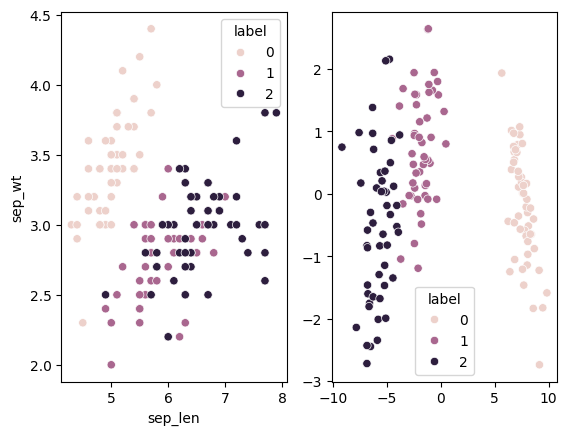

In [19]:
fig, ax =plt.subplots(ncols=2)

# 3개로 분류가 되지 않음
sns.scatterplot(x= iris_df['sep_len'], y=iris_df['sep_wt'], hue = iris_df['label'],ax=ax[0])

# 선형판별식에 투영시킨 결과를 나타냄(축 2개)
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=y_train, ax=ax[1])
plt.show()